# Data Analysis Challenge: Impact of Weather Conditions on Air Quality

## By Okonkwo Chukwuebuka Malcom

![](https://techcommunity.microsoft.com/t5/image/serverpage/image-id/433811i68D426D8793B6B4B/image-size/large?v=v2&px=999)

.

## TABLE OF CONTENTS 

- [INTRODUCTION](#INTRODUCTION)

- [IMPORTING LIBRARIES AND LOADING DATASETS](#IMPORTING-LIBRARIES-AND-LOADING-DATASETS)

- [DATA WRANGLING](#DATA-WRANGLING)

- [EXPLORATORY DATA ANALYSIS](#EXPLORATORY-DATA-ANALYSIS)

- [CONCLUSION](#CONCLUSION)

.

## INTRODUCTION

### Project Context
A company in the environmental consulting industry is seeking to analyze the air quality in a specific city during hot and cold weather, during high-wind conditions and during precipitation. They are interested in making recommendations to the government and businesses in the region on how to mitigate the impact of weather conditions on air quality.  

 

As a Data Analyst, you are expected to analyze the data provided, seek insights and make recommendations to achieve the set objectives.

Additionally, kindly use this dataset to analyze the historical impact of weather conditions on air quality, and make predictions on air quality during specific weather conditions. This information could be used to inform emergency response plans and prepare for potential air quality issues.

[Link to the Challenge](https://techcommunity.microsoft.com/t5/educator-developer-blog/data-analysis-challenge-impact-of-weather-conditions-on-air/ba-p/3719570?WT.mc_id=academic-00000-ooyinbooke)

### Dataset Description 

The dataset contains 43824 rows and 13 columns abd the data time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as NA.

### Column Definition
- No: row number
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- pm2.5: PM2.5 concentration (ug/m^3)
- DEWP: Dew Point (â„ƒ)
- TEMP: Temperature (â„ƒ)
- PRES: Pressure (hPa)
- cbwd: Combined wind direction
- Iws: Cumulated wind speed (m/s)
- Is: Cumulated hours of snow
- Ir: Cumulated hours of rain

.

## IMPORTING LIBRARIES AND LOADING DATASETS

This Project Wrangling & Analysis would be done using Python with the aid of some of its packages, which would be imported. The dataset is also loaded into a dataframe

In [1]:
# Importing the pyhton packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar
from windrose import WindroseAxes

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the dataset into a dataframe
weather = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

#to display the first five rows 
print(weather.head())


   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [3]:
# to confirm the shape of the data
print(weather.shape)

(43824, 13)


.

## Data Wrangling

This is going to be done in 2 major steps
1. Assessing the Data
2. Data Cleaning

 ### Assessing the Data
 
 This step requires visually examining or programmatically examining the data for data quality issues.

In [4]:
# to observe the first 10 rows of the data
print(weather.head(10))

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
5   6  2010      1    1     5    NaN   -19 -10.0  1017.0   NW  16.10   0   0
6   7  2010      1    1     6    NaN   -19  -9.0  1017.0   NW  19.23   0   0
7   8  2010      1    1     7    NaN   -19  -9.0  1017.0   NW  21.02   0   0
8   9  2010      1    1     8    NaN   -19  -9.0  1017.0   NW  24.15   0   0
9  10  2010      1    1     9    NaN   -20  -8.0  1017.0   NW  27.28   0   0


**To check for duplicate records**

In [5]:
# to print out the sum of duplicate rows in the data
duplicate = sum(weather.duplicated())

print(f'There are {duplicate} duplicate records')

There are 0 duplicate records


**To check the data types of the columns**

In [6]:
weather.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

**To get the information about the Dataframe**

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


**To Check the fields for null values**

In [8]:
null_columns = weather.columns[weather.isnull().any()]

print(f'The columns with null values are {list(null_columns)}')

The columns with null values are ['pm2.5']


**To observe random samples of the data**

In [9]:
weather.sample(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
7641,7642,2010,11,15,9,21.0,-8,0.0,1035.0,NW,232.55,0,0
33840,33841,2013,11,11,0,14.0,-12,1.0,1030.0,NW,1.79,0,0
26214,26215,2012,12,28,6,NaN,-13,-8.0,1026.0,NW,19.66,0,0
22483,22484,2012,7,25,19,68.0,24,27.0,1005.0,SE,4.92,0,0
7103,7104,2010,10,23,23,270.0,12,13.0,1019.0,NW,2.68,0,0
11687,11688,2011,5,2,23,14.0,-10,18.0,1014.0,NW,124.28,0,0
13974,13975,2011,8,6,6,NaN,23,23.0,1006.0,cv,0.89,0,0
42284,42285,2014,10,28,20,47.0,3,12.0,1025.0,cv,0.89,0,0
28801,28802,2013,4,15,1,53.0,-2,9.0,1005.0,cv,0.89,0,0
31950,31951,2013,8,24,6,38.0,16,20.0,1010.0,NW,8.50,0,0


**To observe the Combined Wind Direction (cbwd) column**

In [10]:
#checking for the unique values in the cbwd column
weather['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

**To check for the Descriptive Statistics of the columns** 

In [11]:
weather.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


.

### Data Cleaning

After assessing the data, I discovered some data quality issues in the dataset and the cleaning steps are documented below 


In [12]:
# to create a copy of the dataset
weather_copy = weather.copy()

- **To create a "Date" column using the year, month and day columns and change the Datatype to Datetime**

In [13]:
cols=["year","month","day"]
date = weather[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

# insert the data in the 5th column index
weather.insert(5, 'date', date)

#to change the datatype of the date column
weather['date']=pd.to_datetime(weather['date'])


# to check if the changes were made
print(weather.columns)
print(weather.head())

Index(['No', 'year', 'month', 'day', 'hour', 'date', 'pm2.5', 'DEWP', 'TEMP',
       'PRES', 'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')
   No  year  month  day  hour       date  pm2.5  DEWP  TEMP    PRES cbwd  \
0   1  2010      1    1     0 2010-01-01    NaN   -21 -11.0  1021.0   NW   
1   2  2010      1    1     1 2010-01-01    NaN   -21 -12.0  1020.0   NW   
2   3  2010      1    1     2 2010-01-01    NaN   -21 -11.0  1019.0   NW   
3   4  2010      1    1     3 2010-01-01    NaN   -21 -14.0  1019.0   NW   
4   5  2010      1    1     4 2010-01-01    NaN   -20 -12.0  1018.0   NW   

     Iws  Is  Ir  
0   1.79   0   0  
1   4.92   0   0  
2   6.71   0   0  
3   9.84   0   0  
4  12.97   0   0  


.

- **Handle the Null values in the PM2.5 column**

To first check how many null values are in the PM2.5 column

In [14]:
null_values = weather['pm2.5'].isna().sum()

print(f'There are {null_values} null values in the pm2.5 column')

There are 2067 null values in the pm2.5 column


In [15]:
# to observe the rows of null values in pm2.5
null = weather['pm2.5'].isna()

weather[null]

,No,year,month,day,hour,date,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,2010-01-01,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,2010-01-01,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,2010-01-01,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,2010-01-01,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,2010-01-01,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,2014-12-20,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,2014-12-20,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,2014-12-20,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,2014-12-20,NaN,-20,2.0,1028.0,NW,262.85,0,0


The null values would be replaced using Forward fill method and Backward fill for the remaining null values. There are other ways to handle null values which could be found in this article [Dealing With Missing Values in Python – A Complete Guide](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/)

In [16]:
# to replace the null values in the pm2.5 column with the forward fill methond and backward fill method
weather['pm2.5'] = weather['pm2.5'].ffill().bfill()

In [17]:
# to check if the changes were made 
null_values = weather['pm2.5'].isna().sum()

print(f'There are {null_values} null values in the pm2.5 column')

There are 0 null values in the pm2.5 column


.

- **The presence of CV in the cbwd column**

In [18]:
# to check the unique values in the cbwd column
weather['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

According to [Windy,app](https://windy.app/blog/what-is-wind-direction.html#:~:text=In%20the%20beginning%2C%20there%20are,north%20and%20south%20poles%2C%20respectively.), There are four combined wind direction which are northeast (NE), southeast (NW), southwest (SW), and northwest (NW). I believe that 'cv' was a data entry error and it would be replaced with southwest (SW).

In [19]:
# to change cv to SW in the cbwd column
weather['cbwd'].replace(to_replace="cv",
           value="SW", inplace = True)

#to check if the change was made
weather['cbwd'].unique()

array(['NW', 'SW', 'NE', 'SE'], dtype=object)

.

- **Converting the unit of Pressure from hPa to atm (SI unit of atmospheric pressure)**

The PRES column which is the pressure of the atmosphere is in hPa units (Hectopascal). This would be convert to atm which is the standard unit for measuring pressure. According to [Unit Converter](https://www.unitconverters.net/pressure/hectopascal-to-standard-atmosphere.htm), `1hPa = 0.000987 atm`

This would be used to perform the conversion

In [20]:
# to carry out the conversion
pressure = weather['PRES'] * 0.000987

weather.insert(10, 'atm_pressure', pressure)

# to check if it worked
print(weather.columns)
print(weather.head())

Index(['No', 'year', 'month', 'day', 'hour', 'date', 'pm2.5', 'DEWP', 'TEMP',
       'PRES', 'atm_pressure', 'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')
   No  year  month  day  hour       date  pm2.5  DEWP  TEMP    PRES  \
0   1  2010      1    1     0 2010-01-01  129.0   -21 -11.0  1021.0   
1   2  2010      1    1     1 2010-01-01  129.0   -21 -12.0  1020.0   
2   3  2010      1    1     2 2010-01-01  129.0   -21 -11.0  1019.0   
3   4  2010      1    1     3 2010-01-01  129.0   -21 -14.0  1019.0   
4   5  2010      1    1     4 2010-01-01  129.0   -20 -12.0  1018.0   

   atm_pressure cbwd    Iws  Is  Ir  
0      1.007727   NW   1.79   0   0  
1      1.006740   NW   4.92   0   0  
2      1.005753   NW   6.71   0   0  
3      1.005753   NW   9.84   0   0  
4      1.004766   NW  12.97   0   0  


.

- **Grouping the months into season**

There are four seasons which 
- Autumn (September - November)
- Spring (March - May)
- Summer (June - August)
- Winter (December - February)

So for this data cleaning step, I had to Create a function to convert a month number to the season

In [21]:
# to convert from month number to season
def find_season(month):
    season_month = {
        12:'Winter', 1:'Winter', 2:'Winter',
        3:'Spring', 4:'Spring', 5:'Spring',
        6:'Summer', 7:'Summer', 8:'Summer',
        9:'Autumn', 10:'Autumn', 11:'Autumn'}
    return season_month.get(month)

season_list = []
for month in weather['month']:
    season = find_season(month)
    season_list.append(season)
    
weather['Season'] = season_list

In [22]:
# to check if it worked
weather.head()

,No,year,month,day,hour,date,pm2.5,DEWP,TEMP,PRES,atm_pressure,cbwd,Iws,Is,Ir,Season
0,1,2010,1,1,0,2010-01-01,129.0,-21,-11.0,1021.0,1.007727,NW,1.79,0,0,Winter
1,2,2010,1,1,1,2010-01-01,129.0,-21,-12.0,1020.0,1.006740,NW,4.92,0,0,Winter
2,3,2010,1,1,2,2010-01-01,129.0,-21,-11.0,1019.0,1.005753,NW,6.71,0,0,Winter
3,4,2010,1,1,3,2010-01-01,129.0,-21,-14.0,1019.0,1.005753,NW,9.84,0,0,Winter
4,5,2010,1,1,4,2010-01-01,129.0,-20,-12.0,1018.0,1.004766,NW,12.97,0,0,Winter


.

- **To extract the month name from the month number**

In [23]:
# to convert month number to month name 
weather['month_name'] = weather['month'].apply(lambda x: calendar.month_abbr[x])


# to check if it worked
weather['month_name'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

.

- **Dropping the first column**

The first column doesnt have any use case in the anakysis so the column would be dropped

In [24]:
# dropping the 'No' column
weather = weather.drop('No', axis=1)

# to check if it worked 
weather.columns

Index(['year', 'month', 'day', 'hour', 'date', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'atm_pressure', 'cbwd', 'Iws', 'Is', 'Ir', 'Season', 'month_name'],
      dtype='object')

To save the cleaned dataframe to a different file

In [57]:
weather.to_csv('cleaned_weather.csv')

In [1]:
weather.head(10)

NameError: name 'weather' is not defined

.

## Exploratory Data Analysis

Exploratory data analysis will be used in this section to examine the data in order to find patterns, identify anomalies, test hypotheses, and verify presumptions with the aid of summary statistics and graphical representations. The **""Question-Visualization-Observations"** framework would be used. This framework involves asking a question from the data, creating a visualization to find answers, and then recording observations.

### Question: What can be observed about the PM2.5 per time

According to [Department of Health, New York](https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm#:~:text=Fine%20particulate%20matter%20(PM2.5,hazy%20when%20levels%20are%20elevated.), Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated. 

From [Breeze Technologies](https://www.breeze-technologies.de/blog/what-is-an-air-quality-index-how-is-it-calculated/), The levels of PM2.5 have been grouped to determine the air quality status

- **Excellent (0 - 7)**: According to current research, negative impacts on ecosystems are unlikely.
- **Fine (7 - 15)**: All values are under the legal health protection limits. Effects on ecosystems can no longer be ruled out
- **Moderate (15 - 30)**: The health protection limits are mostly still met. Effects on ecosystems are increasingly possible.
- **Poor (30 -55)**: The measured values are at the level of health protection limit values. Health impairments of sensitive persons may occur sporadically.
- **Very Poor (55 - 110)**: The health protection limits have been exceeded. Health impairments of sensitive persons are possible. The population is increasingly informed about the pollutant situation.
- **Severe (110 >)**: The measured values are at alarming levels. The health protection thresholds are clearly exceeded. Health impairments of all persons are possible.


To start answering the Question, I would like to look at the Overall Average PM2.5 

In [25]:
# to find the average pm2.5
mean = weather['pm2.5'].mean()
print(f'The mean value for PM2.5 is {mean}')

The mean value for PM2.5 is 97.80111354508945


> From observing the different levels of PM2.5, I am going to give a safe zone of 100u/gm3 (closer to the mean value and still below the severe level of 110u/gm3

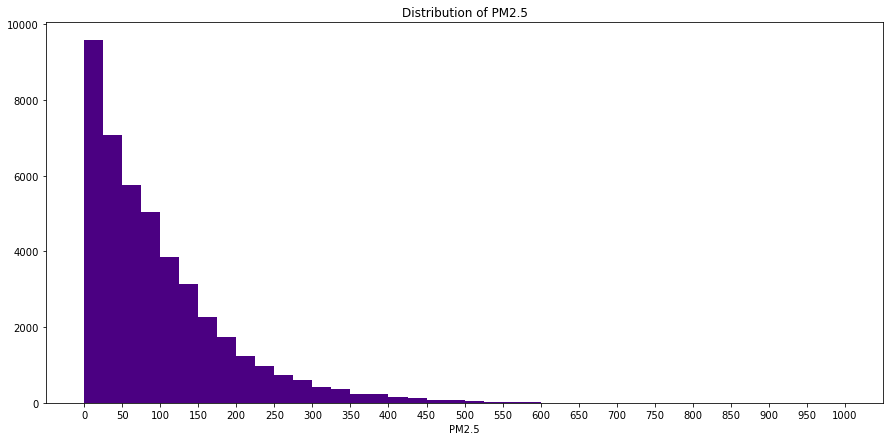

In [26]:
# to observe the distribution of the column
x = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
plt.figure(figsize = (15, 7))
bins = np.arange(0, weather['pm2.5'].max() + 25, 25)
plt.hist(data = weather, x = 'pm2.5', bins = bins, color = 'indigo')
plt.xticks(x)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.show();

> From Observing this chart, the distribution of the PM2.5 values are left skewed having the bulk of its values between 0 - 150u/gm3. Also having values tending towards 1000u/gm3 which is way above the safe limit (100u/gm3)

Let us observe the distribution of PM2.5 per season 

<Figure size 1080x504 with 0 Axes>

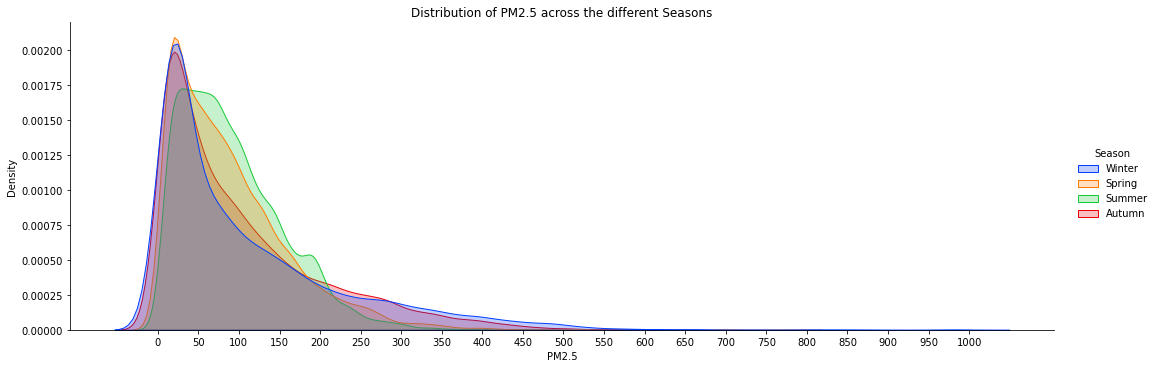

In [27]:
# to observe the distribution of PM2.5 per season
x = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
plt.figure(figsize = (15, 7))
sns.displot(data = weather, x = 'pm2.5', hue = 'Season', kind = 'kde', fill = True,
           palette = sns.color_palette('bright')[:4], height =5, aspect = 3)
plt.xticks(x)
plt.title('Distribution of PM2.5 across the different Seasons')
plt.xlabel('PM2.5')
plt.show();

Observing the Average PM2.5 per time to look at the PM2.5 levels from 2010 to 2014

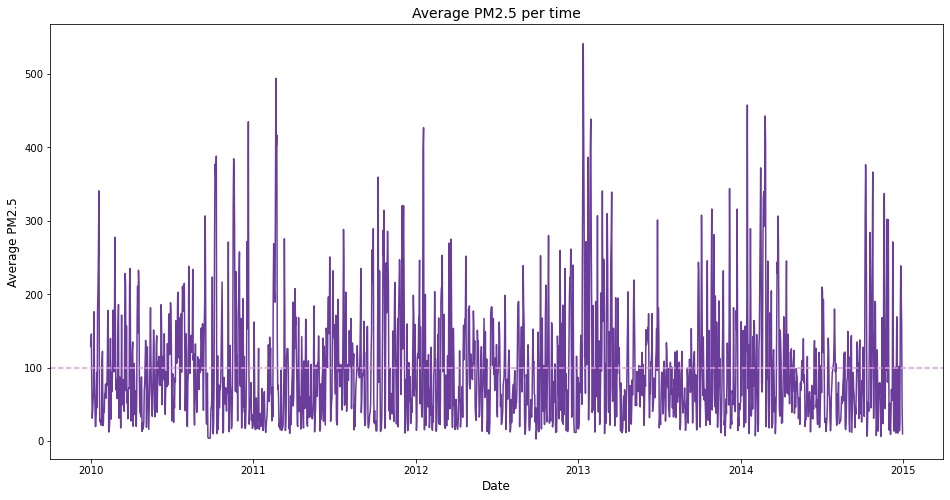

In [28]:
date = weather.groupby('date')['pm2.5'].mean().sort_index()

base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.lineplot(x = date.index, y = date, color = base_color)
plt.axhline(100, ls= '--', color= 'plum')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.show()

> Observing the PM2.5 level from January 1, 2010 to December 31, 2015, we can see that across all years the safe level of 100u/gm3 has been exceeded up on till above an average of 500u/gm3 per day recorded in 2013

Checking the average PM2.5 per year as illustrated below

year
2010    101.626370
2011     97.992580
2012     89.933857
2013    101.600228
2014     97.874087
Name: pm2.5, dtype: float64


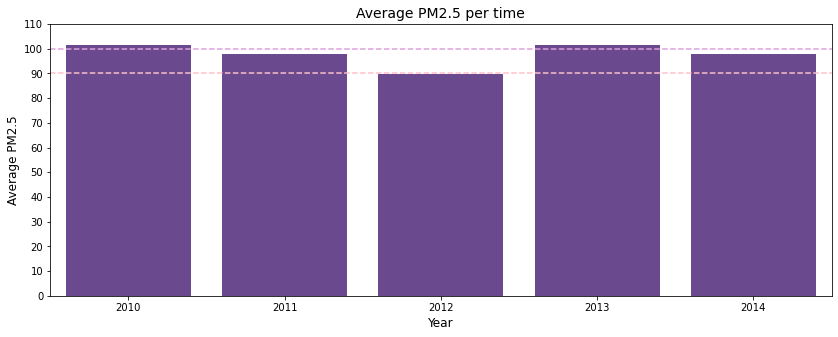

In [47]:
year = weather.groupby('year')['pm2.5'].mean().sort_index()
print(year)

y = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100, 110]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [14, 5])
sns.barplot(x = year.index, y = year, color = base_color)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.yticks(y)
plt.axhline(100, ls= '--', color= 'plum')
plt.axhline(90, ls= '--', color= 'pink')
plt.show()

> **Observation:** On Average, 2010 & 2013 has an average of above 100U/gm3 (Above the safe zone). 2011 & 2014 come very close to an average of 100U/gm3. 2012 is slightly below 90Ug/m3

Next, I would be observing the average PM2.5 level per month to know which months are crossing the safe limit on average

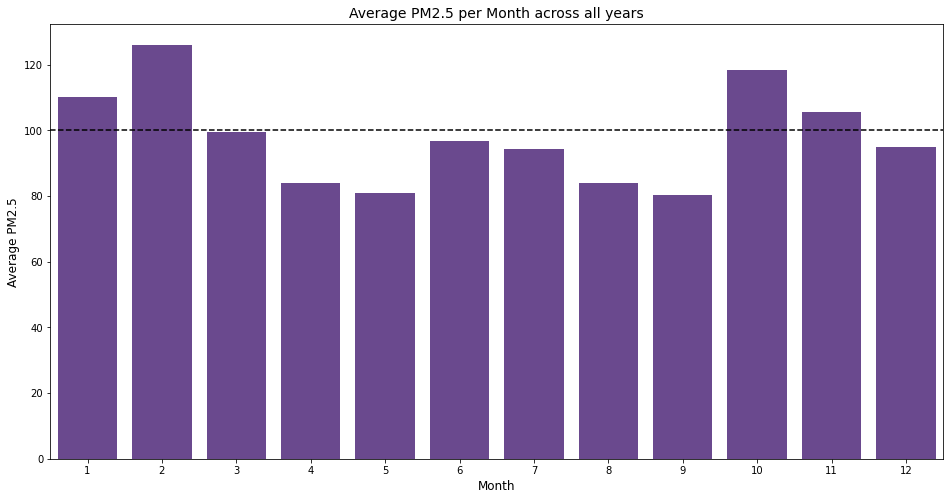

In [30]:
date = weather.groupby('month')['pm2.5'].mean().sort_index()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = date.index, y = date, color = base_color)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per Month across all years', fontsize = 14)
plt.axhline(100, ls= '--', color= 'black')
plt.show()

> **Observation:** It is observed that the PM2.5 levels are higher at the start of the year and towards the end of the year

To observe this further and investigate per year

<Figure size 1152x576 with 0 Axes>

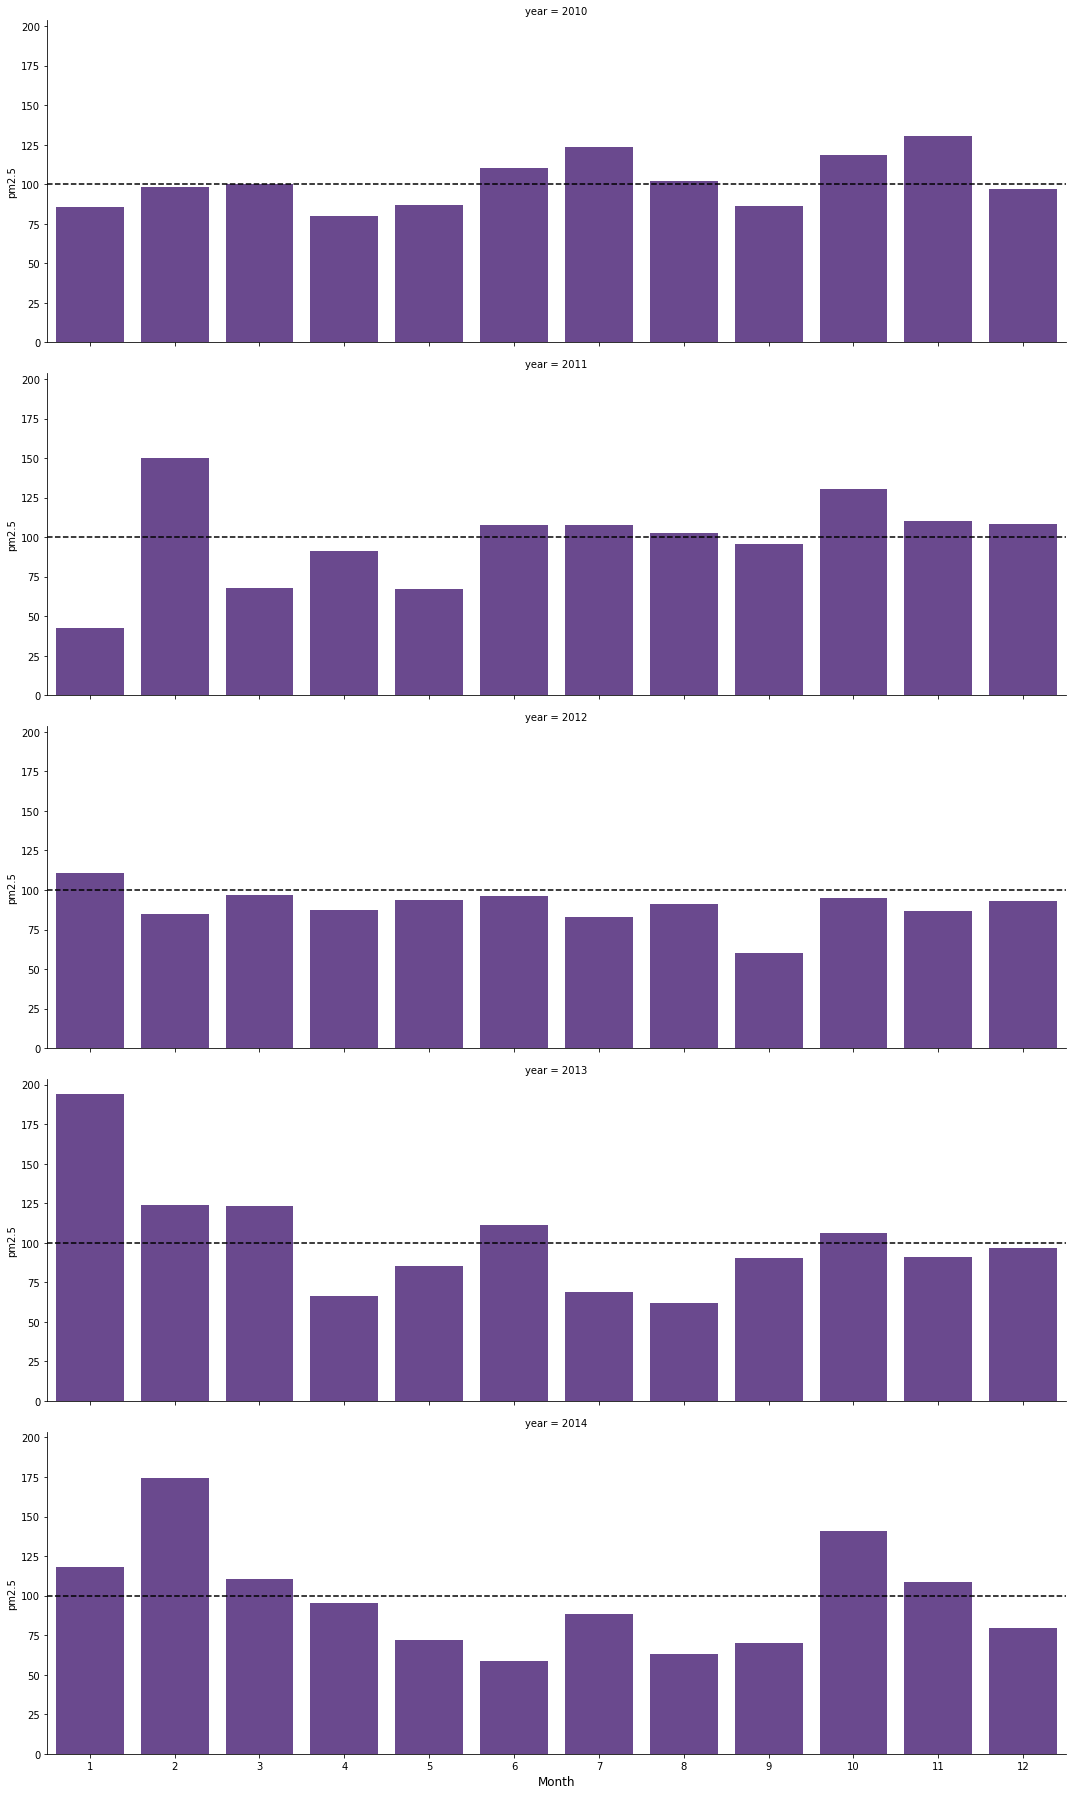

In [31]:
date = weather.groupby('month')['pm2.5'].mean().sort_index()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
g = sns.catplot(x = 'month', y = 'pm2.5', data = weather, kind = 'bar', row = 'year', ci = None, 
            color = base_color, height =5, aspect = 3)
axes = g.axes.flatten()

for i, ax in enumerate(axes):
    ax.axhline(100, ls = '--', c = 'black')
    
plt.xlabel('Month', fontsize = 12)
plt.show();

> **Observation:** On a year - to year observation, It is also observed that towards the middle of the year the PM2.5 level increases in some years. 

I would next like to look into observing the Average PM2.5 levels per season

Season
Autumn    101.582509
Spring     88.245380
Summer     91.739764
Winter    109.914911
Name: pm2.5, dtype: float64


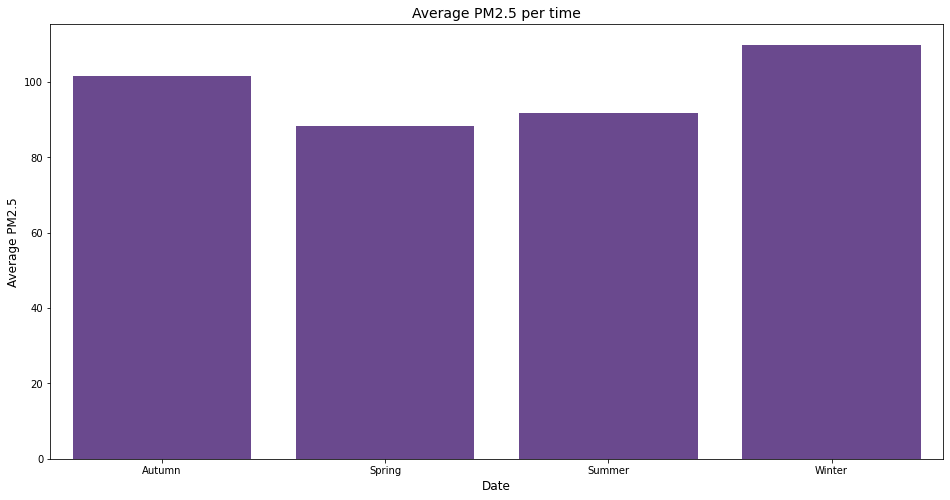

In [48]:
date = weather.groupby('Season')['pm2.5'].mean().sort_index()
print(date)

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = date.index, y = date, color = base_color)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.show()

Since a threshold of 100Ug/m3 was given, I would like to look at which season has the most occurence when the PM2.5 level is above 100Ug/m3

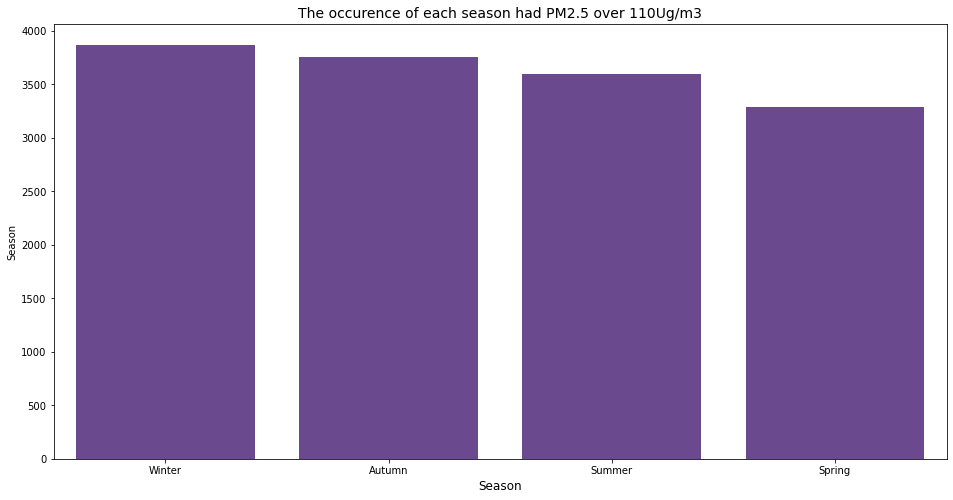

In [50]:
weather_above = weather[weather['pm2.5'] > 110]

high = weather_above['Season'].value_counts()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = high.index, y = high, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.title('The occurence of each season had PM2.5 over 110Ug/m3', fontsize = 14)
plt.show()

> **Observation**: The charts above shows that the higher levels of PM2.5 on average come in the Winter season (December, January and February) and in the Autumn Season (September, October and November)


Next I want to observe the Average PM2.5 levels per Season for each year

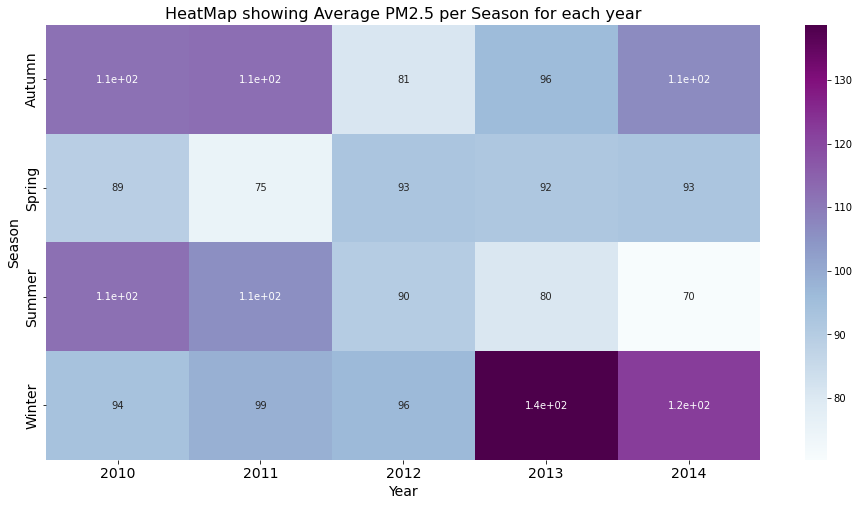

In [33]:
# for clarity purpose, a heatmap is plotted to show the counts 
plt.figure(figsize= (16,8))
weather_mean = weather.groupby(['year','Season'])['pm2.5'].mean()
weather_mean = weather_mean.reset_index(name= 'mean')
weather_mean = weather_mean.pivot(columns = 'year', index = 'Season', values= 'mean')
sns.heatmap(weather_mean, annot= True, cmap= 'BuPu')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Season', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.title("HeatMap showing Average PM2.5 per Season for each year", fontsize= 16);

> After observing the PM2.5 levels for each year and each Season, The winter season has an overall increase in PM2.5 levels and It is getting worse as the years progress. The Level of PM2.5 during the summer was High in 2010 and 2011 but a decrease in the PM2.5 level was noticed till 2014. The PM2.5 level within the Spring season has been generally good and manageable but still poor. The PM2.5 Level in the Autumn season is not acceptable as it surpassess the 100Ug/m3 threshold.

### Question: Does the Wind Speed Affect Air Quality?

For this analysis, I would like to inspect wind speed affect the Air Quality. This indireclty means to check if the PM2.5 level is affected or influenced by the level of Wind Speed

First I would like to observe the Average wind speed in each season

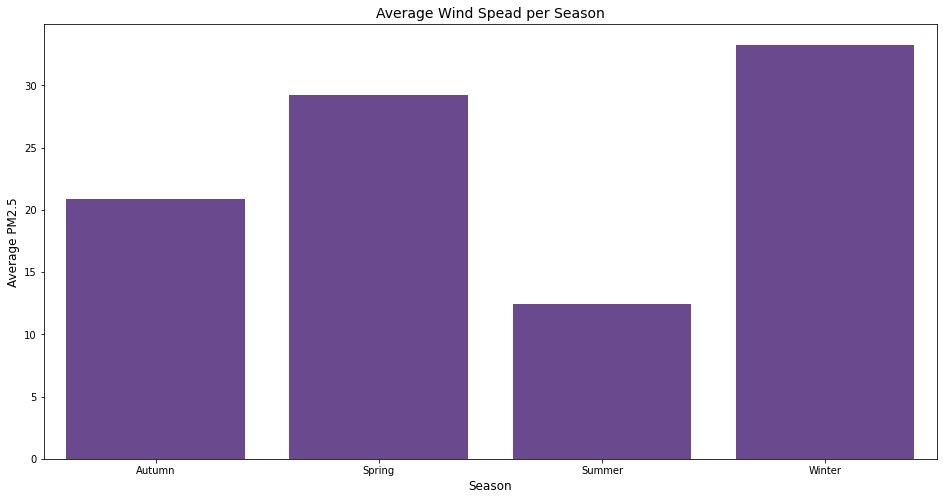

In [34]:
wind = weather.groupby('Season')['Iws'].mean().sort_index()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average Wind Spead per Season', fontsize = 14)
plt.show()

> **Observation**: From Observing the Wind Speed for each season, It is shown that the Wind Speed is the highest during the Winter Season Then the Spring Season. Wind Speed is lowest during the Summer season

Next, I want to observe the direction of Wind. How Often does the wind tend towards a certain direction

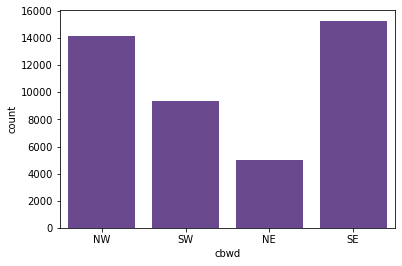

In [35]:
base_color = sns.color_palette("Paired")[9]

# the plot
sns.countplot(data=weather, x='cbwd', color = base_color)
plt.xticks(rotation=0);

> **Observation**: From the viz above, it shows that the wind mostly blows in the direction of the South East and North West.

Next, I want to display the distribution of the windspeed in each Wind direction using a rose plot

In [36]:
# first to convert the wind direction to direction in degrees
def find_angle(angle):
    season_month = {
        'NE': 45, 'SE': 135, 'SW': 225, 'NW': 315}
    return season_month.get(month)

season_list = []
for month in weather['cbwd']:
    season = find_angle(month)
    season_list.append(season)
    
weather['direction'] = season_list

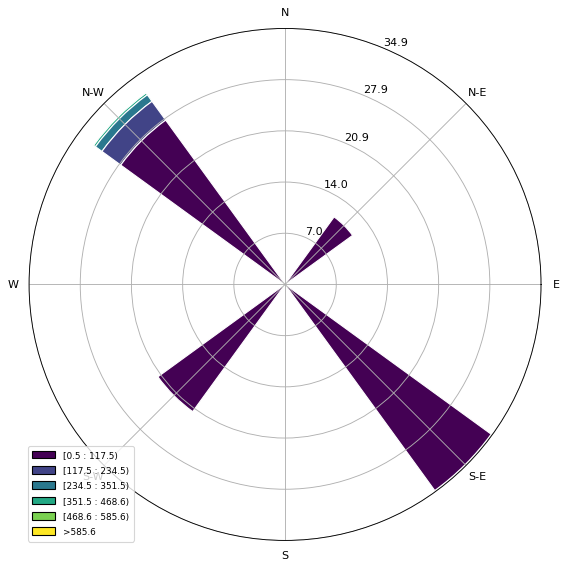

In [37]:
ax = WindroseAxes.from_ax()
ax.bar(weather.direction, weather.Iws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();

> **Observation**: From the plot, we can see that the wind mostly goes in the South East direction but the higher wind speed goes in the North West direction.

Next, I want to observe the Average PM2.5 for each wind direction and each season

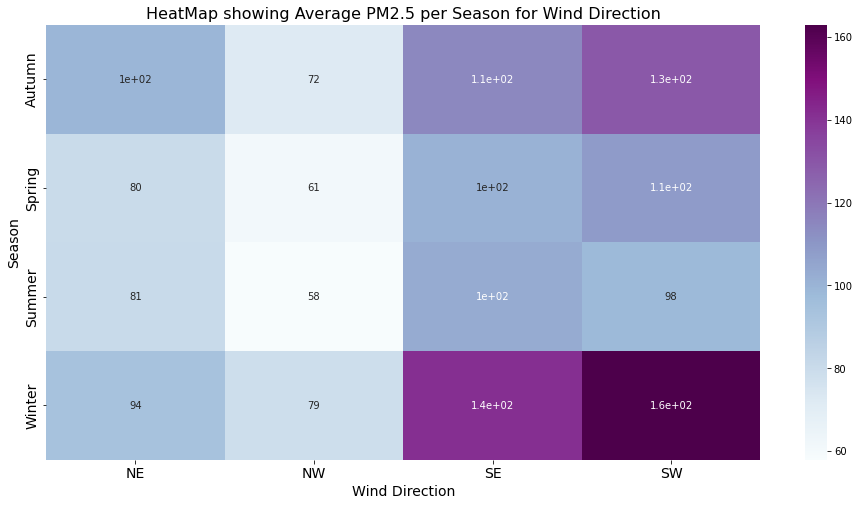

In [38]:
# for clarity purpose, a heatmap is plotted to show the counts 
plt.figure(figsize= (16,8))
weather_mean = weather.groupby(['cbwd','Season'])['pm2.5'].mean()
weather_mean = weather_mean.reset_index(name= 'mean')
weather_mean = weather_mean.pivot(columns = 'cbwd', index = 'Season', values= 'mean')
sns.heatmap(weather_mean, annot= True, cmap= 'BuPu')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Season', fontsize = 14)
plt.xlabel('Wind Direction', fontsize = 14)
plt.title("HeatMap showing Average PM2.5 per Season for Wind Direction", fontsize= 16);

> **Observation:** The Average PM2.5 levels are higher during the winter season and when the Wind Direction is South West. Higher levels of PM2.5 occur in the South East Direction and South West. 


Next, I want to observe the relationship between wind speed and PM2.5 

Correlation between PM2.5 and Wind Speed is:  -0.24


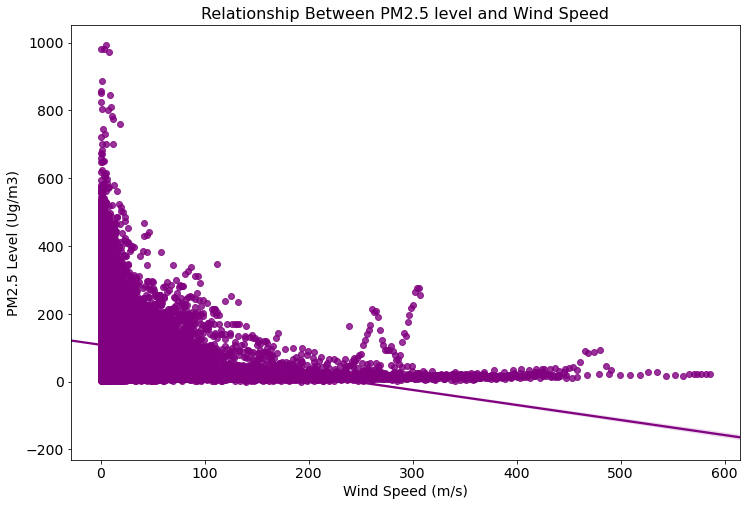

In [39]:
# to print out the correlation between wind speed and PM2.5
corr = weather['pm2.5'].corr(weather['Iws'])
print("Correlation between PM2.5 and Wind Speed is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'Iws', y = 'pm2.5', data = weather, color = 'purple', truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 Level (Ug/m3)', fontsize = 14)
plt.xlabel("Wind Speed (m/s)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Wind Speed", fontsize= 16)
plt.show();

> **Observation:** From the visual above, there is a negative correlation coefficient of -0.24 which signifies a very low correlation and can be considered negligible. On looking for trends and patterns, It is showing that when the Wind speed is very low, there is high PM2.5 level. It is safe to say that the lower the wind speed, the higher the PM2.5 level

Next, I want to observe the relationship between PM2.5 and Wind Speed in the different seasons 

In [40]:
# to print out the correlation between wind speed and PM2.5
weather_autumn = weather[weather['Season'] == 'Autumn']
corr = weather_autumn['pm2.5'].corr(weather_autumn['Iws'])
print("Correlation between PM2.5 and Wind Speed during Autumn is: ", round(corr, 2))

weather_spring = weather[weather['Season'] == 'Spring']
corr = weather_spring['pm2.5'].corr(weather_spring['Iws'])
print("Correlation between PM2.5 and Wind Speed during Spring is: ", round(corr, 2))

weather_summer = weather[weather['Season'] == 'Summer']
corr = weather_summer['pm2.5'].corr(weather_summer['Iws'])
print("Correlation between PM2.5 and Wind Speed during Summer is: ", round(corr, 2))

weather_winter = weather[weather['Season'] == 'Winter']
corr = weather_winter['pm2.5'].corr(weather_winter['Iws'])
print("Correlation between PM2.5 and Wind Speed during Winter is: ", round(corr, 2))

Correlation between PM2.5 and Wind Speed during Autumn is:  -0.24
Correlation between PM2.5 and Wind Speed during Spring is:  -0.27
Correlation between PM2.5 and Wind Speed during Summer is:  -0.01
Correlation between PM2.5 and Wind Speed during Winter is:  -0.3


> **Observation:** The relationship between the PM2.5 and Wind Speed is really low across all seasons.



### Question: Does the Temperature and Pressure Affect Air Quality?

This Question tends to observe the relationship between Temperature and Pressure and the PM2.5. Before I start exploring the relationship, I would like to show the average Temperature per season 

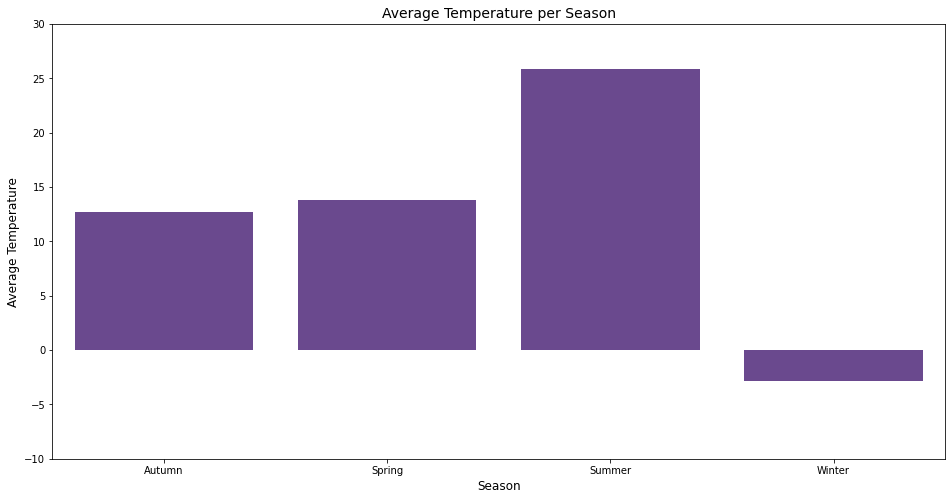

In [41]:
wind = weather.groupby('Season')['TEMP'].mean().sort_index()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = [-10, -5, 0, 5, 10, 15, 20, 25, 30]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Temperature', fontsize = 12)
plt.yticks(x)
plt.title('Average Temperature per Season', fontsize = 14)
plt.show()

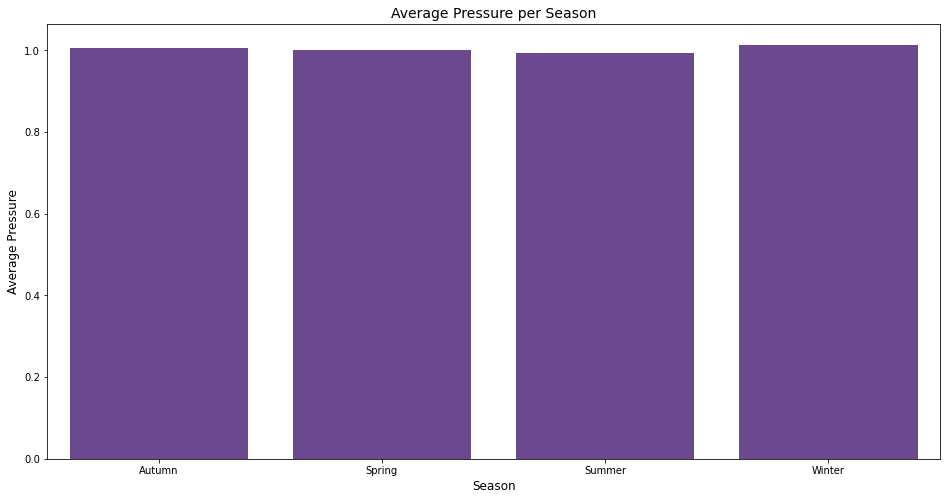

In [52]:
wind = weather.groupby('Season')['atm_pressure'].mean().sort_index()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Pressure', fontsize = 12)
plt.title('Average Pressure per Season', fontsize = 14)
plt.show()

> **Observation:** The Chart above shows that the Average temperature is lowest during the winter period and it is highest during the summer period. The Average pressure shows that across all season, the pressure level is consistent around 1 atm

I want to observe the relationship between Temperature and PM2.5

Correlation between PM2.5 and Atmosperic Temperature is:  -0.08


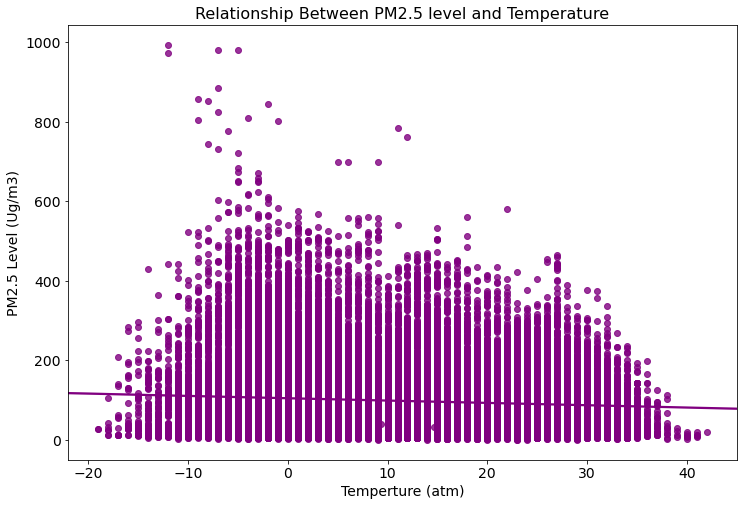

In [42]:
# to print out the correlation between wind speed and PM2.5
corr = weather['pm2.5'].corr(weather['TEMP'])
print("Correlation between PM2.5 and Atmosperic Temperature is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'TEMP', y = 'pm2.5', data = weather, color = 'purple', truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 Level (Ug/m3)', fontsize = 14)
plt.xlabel("Temperture (atm)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Temperature", fontsize= 16)
plt.show();

>**Observation:** The Relatioship between Temperature and the PM2.5 Level is close to zero which means there is no correlation. On trying to observe patterns, I cannot seem to see a clear pattern in the scatter diagram

### Question: Does the Precipitation level affect the PM2.5 Level

I would first like to check the Average hours of rain level in each season 

Season
Autumn    0.288004
Spring    0.153895
Summer    0.332337
Winter    0.002679
Name: Ir, dtype: float64


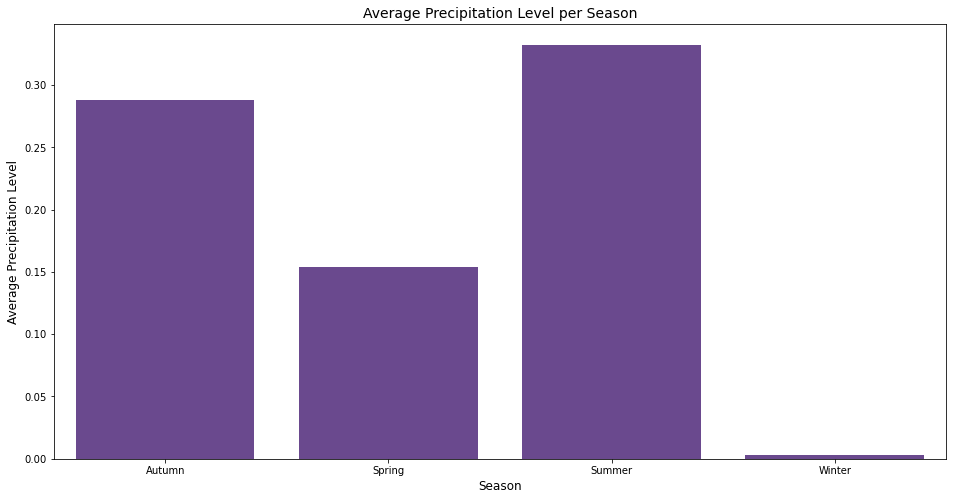

In [49]:
wind = weather.groupby('Season')['Ir'].mean().sort_index()
print(wind)

base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Precipitation Level', fontsize = 12)
plt.title('Average Precipitation Level per Season', fontsize = 14)
plt.show()

> **Observation:** The amount of hours of rainfall (Precipitation Level) is observed highest in the Summer Season and In the autumn season

Next I want to observe the relationship between Number of hours of precipitation and PM2.5 level

Correlation between PM2.5 and Precipitation Level is:  -0.05


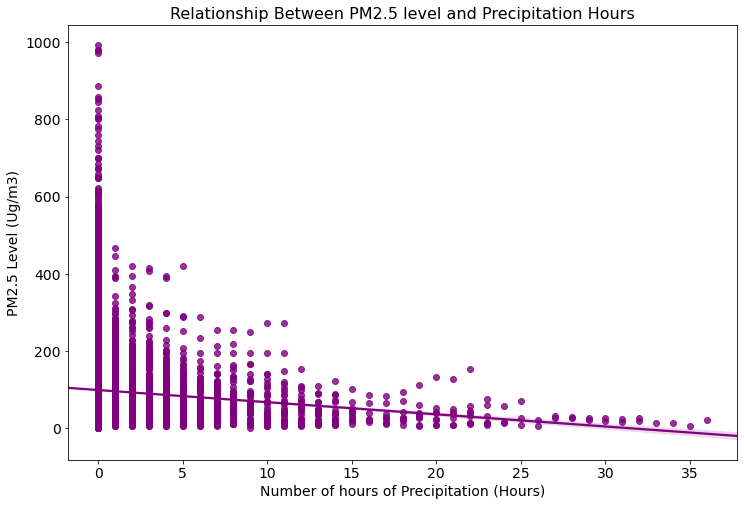

In [44]:
# to print out the correlation between wind speed and PM2.5
corr = weather['pm2.5'].corr(weather['Ir'])
print("Correlation between PM2.5 and Precipitation Level is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'Ir', y = 'pm2.5', data = weather, color = 'purple', truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 Level (Ug/m3)', fontsize = 14)
plt.xlabel("Number of hours of Precipitation (Hours)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Precipitation Hours", fontsize= 16)
plt.show();

> **Observation:** The correlation between number of hours of precipitation and PM2.5 is almost 0, this means that there is no linear relationship between the two variables. On looking for patterns, It is observed that for Low amount of precipitation hours (below 15 hours), There are observed to be high PM2.5 level. It is safe to say that the lower the hours of rainfall, the higher the PM2.5 level

### Question: Does the Snowing time affect the PM2.5 Level

I would first like to check the Average hours of snow level in each season 

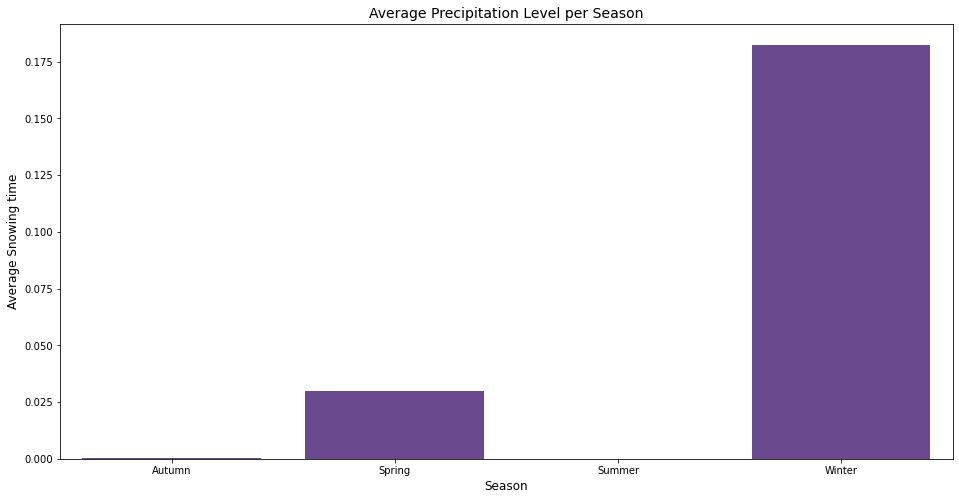

In [45]:
wind = weather.groupby('Season')['Is'].mean().sort_index()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Snowing time', fontsize = 12)
plt.title('Average Precipitation Level per Season', fontsize = 14)
plt.show()

>**Observation:** The higher hours of snowing time were observed during the winter then during the spring season. It is evident from the chart that it does not really snow in other seasons compared to winter

Next is to observe the relationship between Snowing time and PM2.5 level

Correlation between PM2.5 and Snowing hours is:  0.02


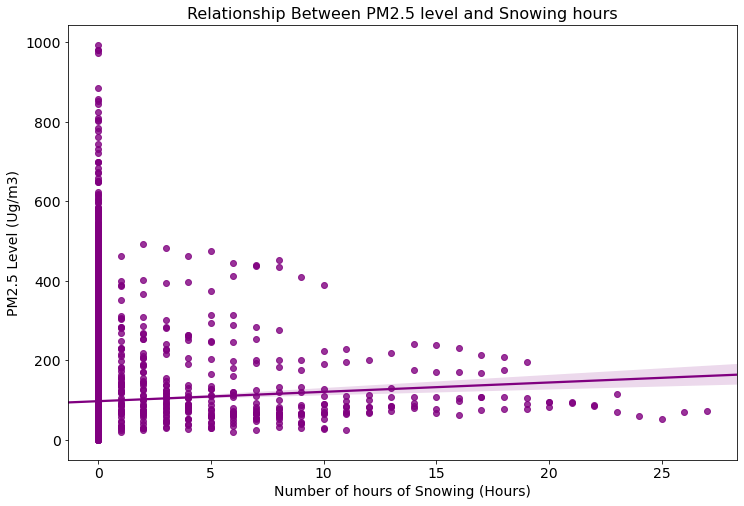

In [46]:
# to print out the correlation between wind speed and PM2.5
corr = weather['pm2.5'].corr(weather['Is'])
print("Correlation between PM2.5 and Snowing hours is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'Is', y = 'pm2.5', data = weather, color = 'purple', truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 Level (Ug/m3)', fontsize = 14)
plt.xlabel("Number of hours of Snowing (Hours)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Snowing hours", fontsize= 16)
plt.show();

>**Observation:** From the chart above, it shows that as the number of hours of snowing reduces the higher the PM2.5 level. It is not safe to say this because there is not always snowing in all seasons so I cannot attribute lack of snow to the increase in PM2.5 level. 

.

## Conclusion



### Insights

The main aim of this Analysis is to discover the impact of weather conditions on Air Quality. Air Quality in this dataset is determined by the level (Concentration in Ug/m3) of Particulate matter (PM2.5) in the atmosphere.
According to Breeze Technologies, PM2.5 levels over 55Ug/m3 shows a poor level of air quality and above 110Ug/m3 shows a severe level of air quality. For this analysis, a limit of 100Ug/m3 was placed to signify that the air quality is getting to a severe level. 

After Exploring the dataset and doing research on this case study, I discovered the following insights 

- On checking the Mean value of PM2.5 across all years, the mean value is 97.80Ug/m3 which is very close to the threshold. After checking for the average PM2.5 for each year; for 2010 the average is 101.63Ug/m3, for 2011 the average is 97.99Ug/m3, for 2012 the average is 89.93Ug/m3, 2013 the average is 101.60Ug/m3 and 2014 the average is 97.87Ug/m3. From this observation, the city's air quality is not at its best with average PM2.5 level in the poor level.

- After checking the PM2.5 level for each Month and Season, It is observed that PM2.5 level is the highest during the Winter Season (December to February) having approximately 110Ug/m3 on average. The Average PM2.5 level during the Autumn season also surpassed the threshold having 101.58Ug/m3. The The average PM2.5 level during the spring season and summer season is 88.24Ug/m3 and 91.74Ug/m3. From this observation, it tells that the PM2.5 level is worse during the winter season then the autumn season. 

- After observing the relationship between the wind speed and the PM2.5 level. It is observed that the lower the wind speed the higher the PM2.5 level. 

- Higher levels of PM2.5 occurs more often when the wind direction is going towards the South West (SW) then the South East. It gets extremely high during the winter period when the wind direction is headed towards the South East and South West

- There was no relationship or pattern observed between the temperature and the PM2.5 levels

- There was a steady Pressure level of approximately 1 atm

- On periods where there are a low hours of precipitation (rainfall), the PM2.5 levels are extremely high. When there are longer hours of rainfall, the PM2.5 levels are low in comparison to when there are longer amount of rainfall.

### Recommendations

After gathering insights from the data, I would love to make a few recommendations

- Since the city's average PM2.5 level is normally high, I strongly advise the government to check into United States's National Action Plan on Pollutant & Control, which intends to reduce PM 2.5 (respirable, pollution particles) concentrations by 20% to 30% above 2017 annual levels in more than 100 cities. By reducing reliance on coal, limiting car emissions, expanding the production of renewable energy sources, and strictly enforcing emissions regulations, the plan promised to achieve these objectives. 

- When the wind is blowing in the south-west and south-east directions, high levels of PM2.5 are seen. Tracking the sources of the pollutants and putting a stop to them will help lower the PM2.5 concentration.

- The PM2.5 concentration was seen to rise quickly throughout the winter months. This may be due to the extensive use of coal and other fossil fuels in the production of heat. When possible, I advise replacing biomass fuels, such as wood, animal dung, and crop wastes, or coal, in homes that use them for cooking and heating with cleaner fuels, including biogas (methane), liquid petroleum gas (LPG), electricity, or solar cookers..

- From the Analysis, A High Amount of hours of rain and snow shows a low level of PM2.5 levels. According to [Davis Instrument](https://www.davisinstruments.com/blogs/newsletter/meteorology-101-how-weather-affects-air-quality), Rain and Snow can wash particulate matter out of the air and destroy dissolvable pollutants.  While the pollutants are washed out or dispersed, they are not gone. They are just moved somewhere else. They end up in someone else’s lungs, or dropped into bodies of water for aquatic plants and animals to deal with. It is advised that citizens who are very sensitive health-wise should refrain from excessive outdoors activities so that they wouldnt get infected